In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
top = Table.read_table('http://inferentialthinking.com/notebooks/top_movies.csv')
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


## Bar Charts

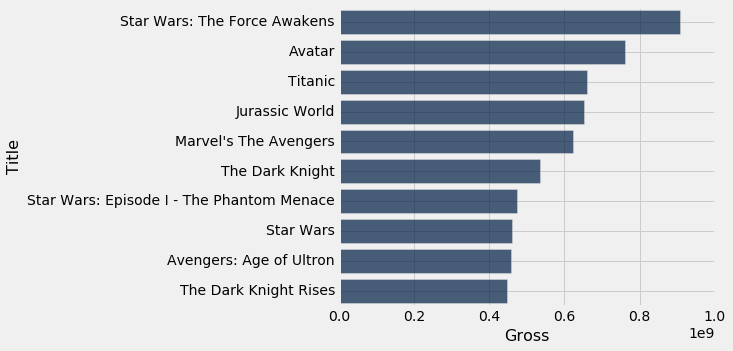

In [3]:
top.take(np.arange(10)).barh(0, 2)

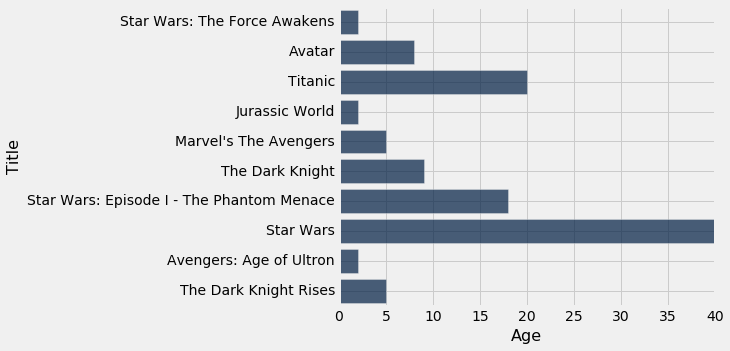

In [4]:
aged = top.with_column("Age", 2017-top.column('Year'))
aged.take(np.arange(10)).barh('Title', 'Age')

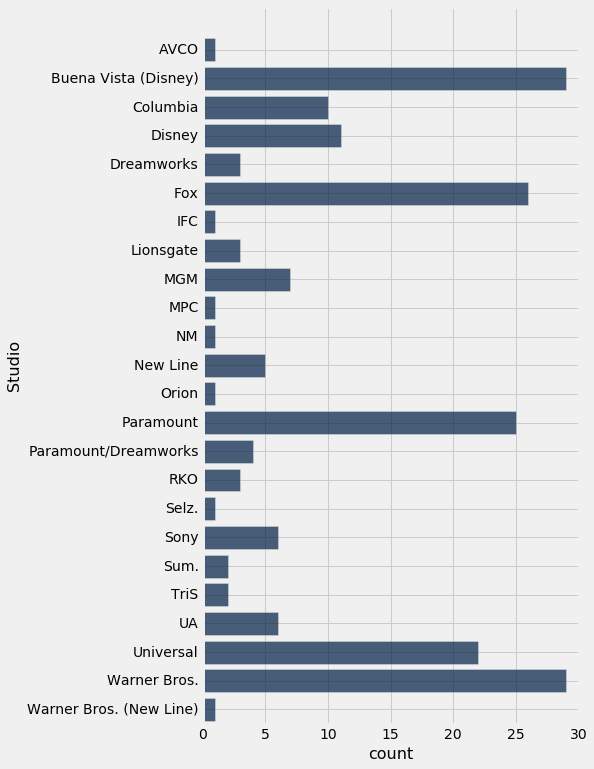

In [5]:
top.group('Studio').barh('Studio', 'count')

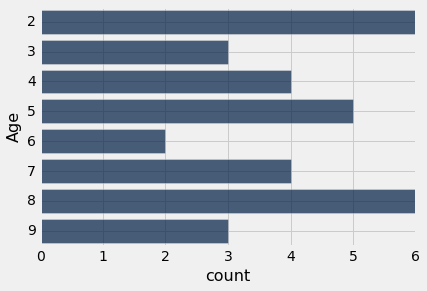

In [28]:
# Used take just for printing purposes
aged.group('Age').take(np.arange(8)).barh('Age', 'count')

## Histograms

In [7]:
aged.group('Age')

Age,count
2,6
3,3
4,4
5,5
6,2
7,4
8,6
9,3
10,5
11,3


In [8]:
aged.bin('Age')

bin,Age count
2,41
11.4,40
20.8,30
30.2,24
39.6,24
49,20
58.4,11
67.8,7
77.2,2
86.6,1


In [32]:
aged.bin('Age', bins=make_array(0, 20, 40, 60, 80, 100)) # Or use list as shortcut

bin,Age count
0,76
20,59
40,44
60,19
80,2
100,0


In [10]:
np.arange(0, 101, 20)

array([  0,  20,  40,  60,  80, 100])

In [11]:
aged.bin('Age', bins=np.arange(0, 101, 20))

bin,Age count
0,76
20,59
40,44
60,19
80,2
100,0


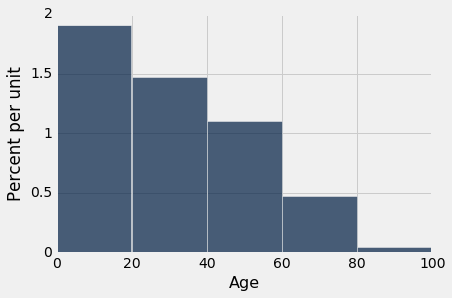

In [13]:
aged.hist('Age', bins=np.arange(0, 101, 20))

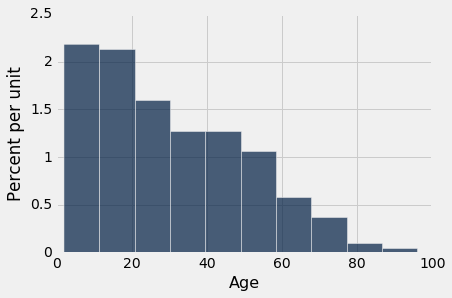

In [12]:
aged.hist('Age')

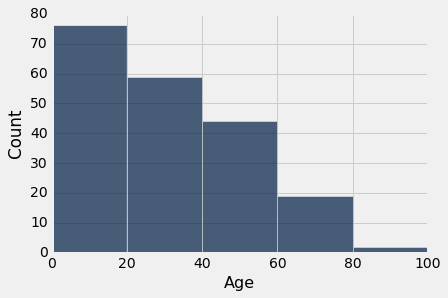

In [14]:
aged.hist('Age', bins=np.arange(0, 101, 20), normed=False)

## Density

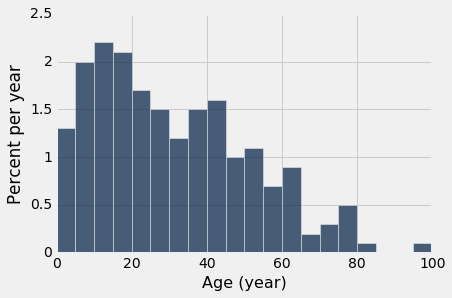

In [16]:
aged.hist('Age', bins=np.arange(0, 101, 5), unit='year')

If we don't use the density scale and change bins, bad things happen:

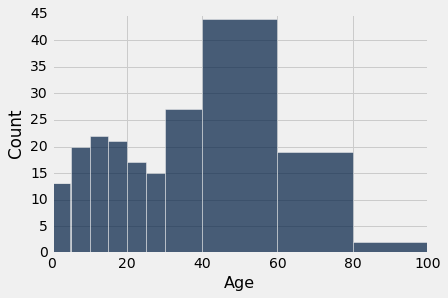

In [34]:
# aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], normed=False) 
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], normed=False) 

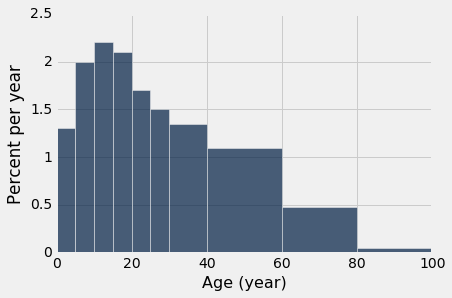

In [17]:
aged.hist('Age', bins=[0, 5, 10, 15, 20, 25, 30, 40, 60, 80, 100], unit='year')

## Overlaid Graphs

In [35]:
heights = Table.read_table('http://inferentialthinking.com/notebooks/galton_subset.csv')
heights = heights.select(2, 0, 1)
heights

son,father,mother
73.2,78.5,67
73.5,75.5,66.5
71,75,64
70.5,75,64
72,75,58.5
76.5,74,68
74,74,62
71,73,67
68,73,67
71,73,66.5


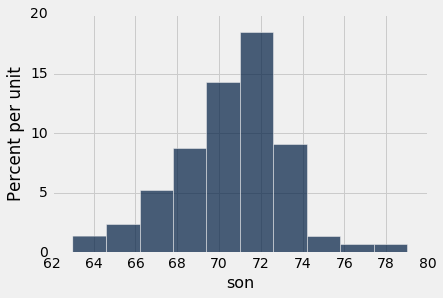

In [20]:
heights.hist('son')

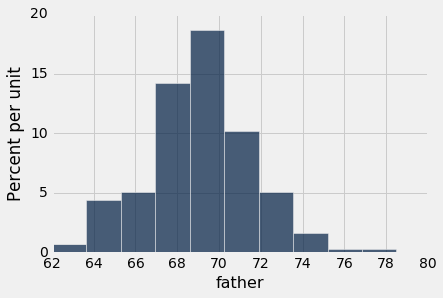

In [21]:
heights.hist('father')

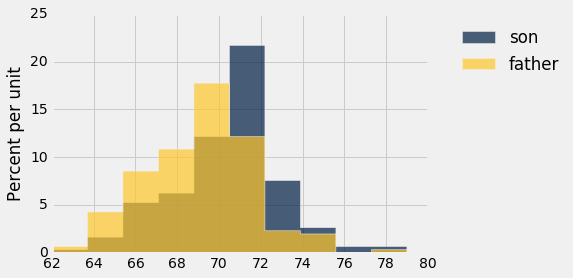

In [22]:
heights.hist('son', 'father')

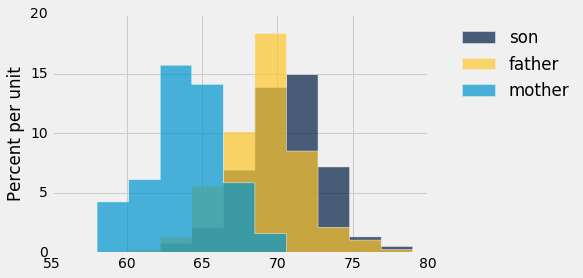

In [23]:
heights.hist('son', 'father', 'mother')

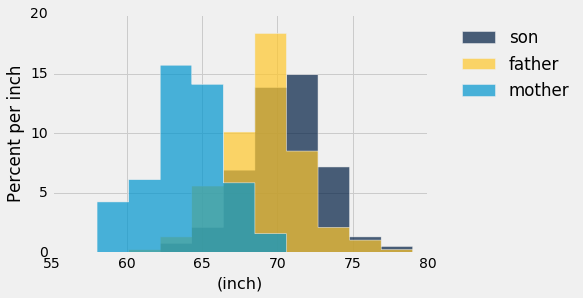

In [24]:
heights.hist(unit='inch')

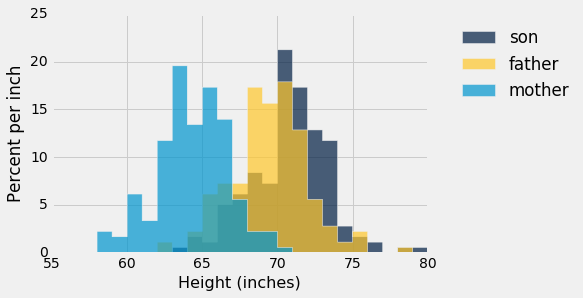

In [36]:
heights.hist(bins=np.arange(55, 81, 1), unit='inch')
_ = plt.xlabel('Height (inches)')

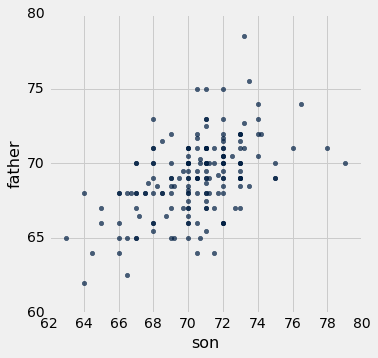

In [37]:
heights.scatter('son', 'father')

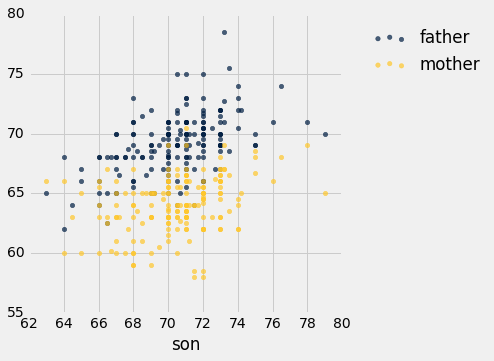

In [38]:
heights.scatter('son')